<a href="https://colab.research.google.com/github/sankalpsinghthakur/Iris-dataset-/blob/main/irisdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from collections import Counter

In [ ]:
# import iris dataset
iris = datasets.load_iris()
#print(iris)
# np.c_ is the numpy concatenate function
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                       columns= iris['feature_names'] + ['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
X = iris_df.iloc[:,:-1]
Y = iris_df.iloc[:,:-1]

In [ ]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
Y.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#split the data into tarin and test sets
X_train, X_test, Y_test, Y_train, = train_test_split(X, Y ,
                                                     test_size =0.2,
                                                     shuffle =True,
                                                     random_state = 0)
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

X_test = np.asarray(X_test)
Y_test = np.asarray(Y_test)


In [ ]:
scaler = Normalizer().fit(X_train)
normalized_X_train = scaler.transform(X_train)
normalized_X_test = scaler.transform(X_test)

In [ ]:
print("X tarin before Normalization")
print(X_train[0:5])
print("\nX train after Normalization")
print(normalized_X_train[0:5])

X tarin before Normalization
[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]]

X train after Normalization
[[0.69804799 0.338117   0.59988499 0.196326  ]
 [0.69333409 0.38518561 0.57777841 0.1925928 ]
 [0.80641965 0.54278246 0.23262105 0.03101614]
 [0.71171214 0.35002236 0.57170319 0.21001342]
 [0.69417747 0.30370264 0.60740528 0.2386235 ]]


AttributeError: 'Text' object has no property 'Y'

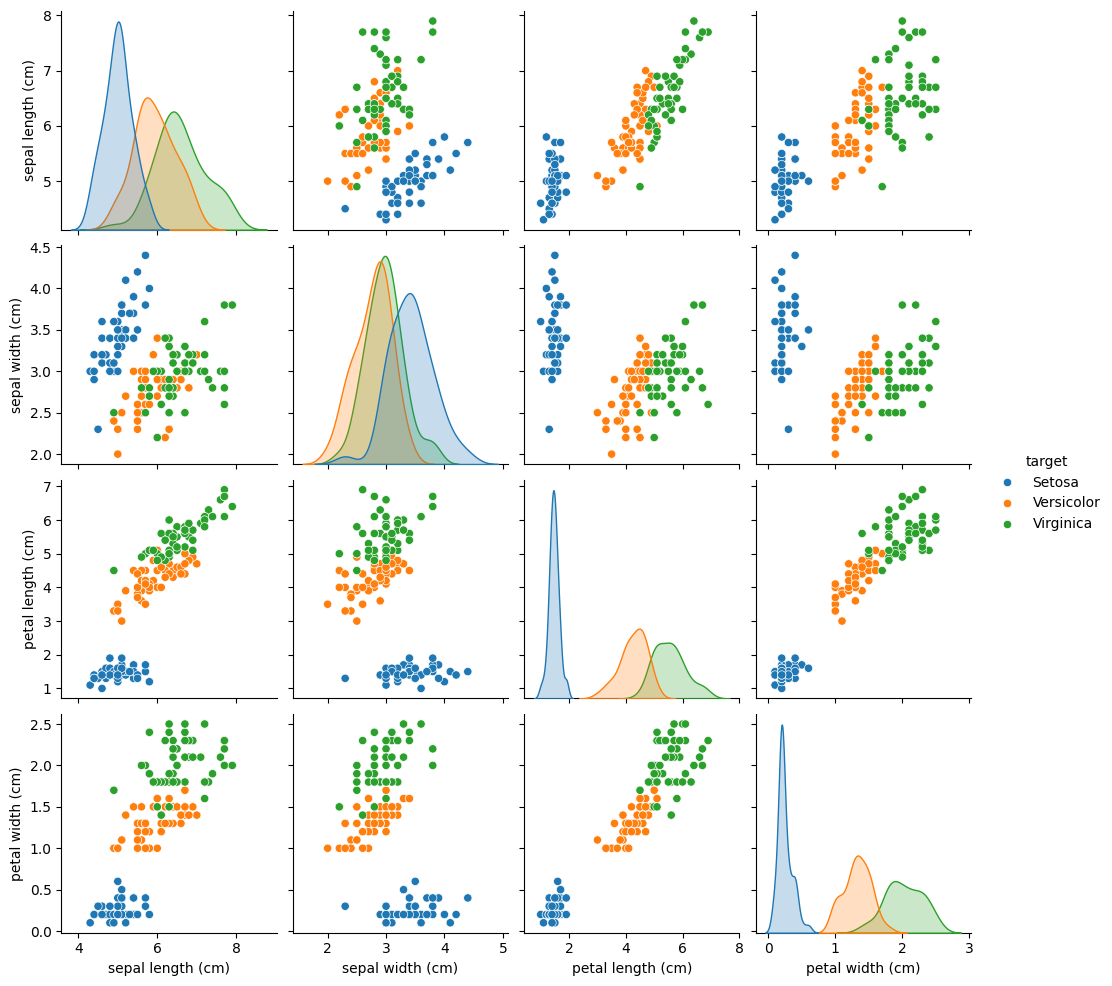

In [ ]:
## Before
# view the relationships between variables; color code by species type
di = {0.0: "Setosa", 1.0: "Versicolor", 2.0: "Virginica"}

before = sns.pairplot(iris_df.replace({"target": di}), hue='target')
before.fig.suptitle("Pair Plot of the dataset Before normalization", Y=1.08)

## After
iris_df_2 = pd.DataFrame(data= np.c_[normalized_X_train, Y_train],
                         columns = iris['feature_names'] + ['target'])

di = {0.0: "Setosa", 1.0: "Versicolor", 2.0: "Virginica"}
after = sns.pairplot(iris_df_2.replace({"target": di}), hue='target')

after.fig.suptitle("Pair Plot of the dataset After normalization", Y=1.08)